<a href="https://colab.research.google.com/github/JavZon/Unsupervised-Learning/blob/main/KMeans_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

**Make blobs**

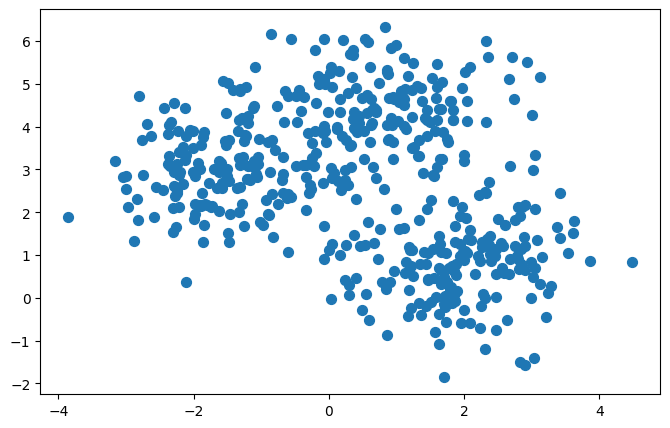

In [3]:
X, y = make_blobs(n_samples=500, centers=3, cluster_std=0.9, random_state=0)

# Visualize the data
plt.figure(figsize=(8,5))
plt.scatter(X[:,0],X[:,1] ,s=50)
plt.show()

In [4]:
X[:5,:]

array([[ 1.09049096,  4.66557775],
       [-1.89225157,  3.56981392],
       [-1.98366985,  1.97119017],
       [ 1.55238845,  2.84852689],
       [-0.76638175,  4.47368806]])

In [5]:
y

array([0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0, 2, 0, 1, 1,
       1, 2, 0, 2, 1, 2, 0, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1,
       1, 0, 1, 0, 2, 2, 0, 0, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 1, 1, 1, 2,
       0, 1, 2, 0, 2, 0, 0, 2, 1, 2, 1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 2,
       2, 2, 0, 0, 1, 0, 2, 1, 2, 2, 2, 0, 1, 2, 2, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 1, 0,
       2, 1, 0, 1, 2, 2, 1, 0, 0, 2, 2, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 2, 1, 2, 0, 1, 1, 2, 2, 2, 1, 0, 1, 0, 1, 2, 2, 1, 0, 0, 2,
       2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 0, 2, 2, 0, 1, 1, 0, 2, 1, 0,
       2, 1, 2, 1, 0, 0, 2, 1, 1, 1, 2, 2, 0, 1, 1, 2, 2, 0, 2, 0, 2, 2,
       1, 2, 1, 1, 0, 0, 0, 1, 2, 0, 0, 2, 2, 1, 2, 2, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 1, 2, 1, 1, 0, 0, 1,
       1, 0, 2, 1, 2, 1, 1, 2, 1, 0, 0, 1, 0, 1, 1, 1, 1, 2, 1, 0, 0, 0,
       0, 2, 2, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 0,

Assigning **KMeans** algorithm

In [6]:
kmeans = KMeans(n_clusters=3,n_init=15, init='k-means++')
kmeans.fit(X)

KMeans(n_clusters=3, n_init=15)

In [7]:
labels=kmeans.labels_

In [8]:
labels[:10]

array([0, 2, 2, 0, 0, 0, 2, 2, 2, 0], dtype=int32)

In [9]:
center=kmeans.cluster_centers_
print(center)

[[ 0.87872667  4.43282322]
 [ 1.93755924  0.76798907]
 [-1.5216406   2.94510303]]


Visualize dots

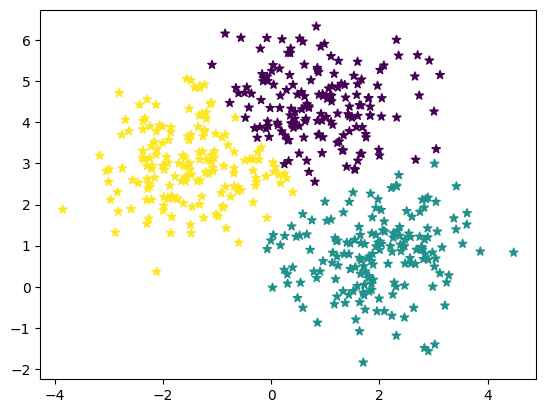

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', marker='*')
plt.show()

Visualize centers

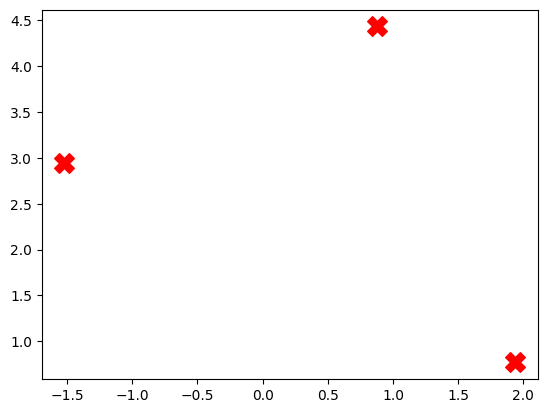

In [11]:
plt.scatter(center[:, 0], center[:, 1], s=200, c='red', marker='X')
plt.show()

Visualize **dots** and **centers** together

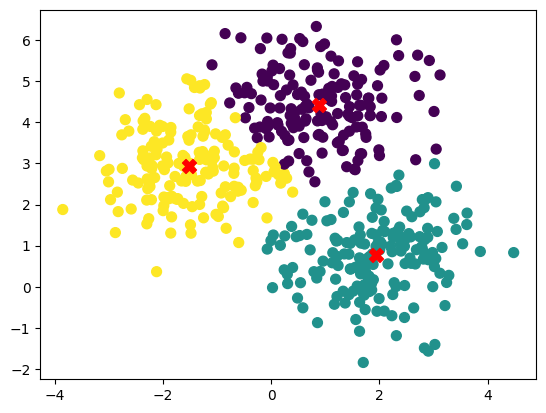

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

# Plot centroids
plt.scatter(center[:, 0], center[:, 1], s=100, c='red', marker='X')
plt.show()

SSE (Sum of Squared Error) -

In [13]:
kmeans.inertia_

733.9796081166711

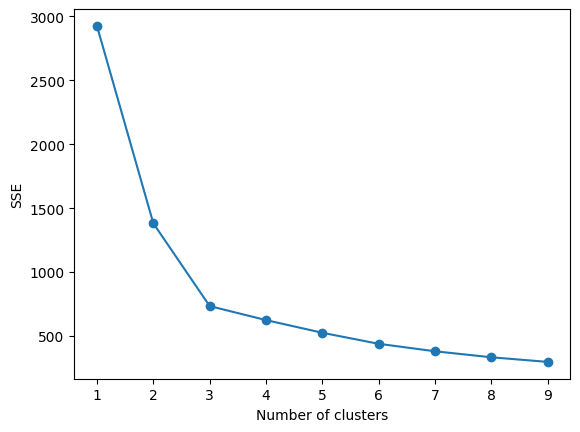

In [14]:
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, n_init=15)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 10), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

**Voronai plot** - plotting the boudaries among clusters

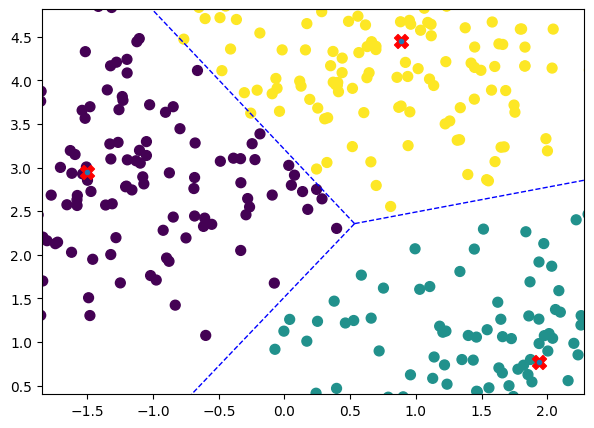

In [20]:
from scipy.spatial import Voronoi, voronoi_plot_2d

fig, ax = plt.subplots(figsize=(7, 5))

# Scatter plot the data and centroids
ax.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
ax.scatter(center[:, 0], center[:, 1], s=100, c='red', marker='X')

# Plot the Voronoi diagram on the axes
vor = Voronoi(center)
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='blue')

plt.show()

**Silhouette** score

In [19]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Compute silhouette scores

print(f"Average Silhouette Score: {silhouette_score(X, kmeans.labels_)}")

Average Silhouette Score: 0.34503893139336167


In [20]:
sse

[2925.958310936989,
 1381.7364763711803,
 733.9796081166711,
 624.3751289922587,
 525.0183296997549,
 438.7239596119351,
 380.26145044200723,
 333.36406916707045,
 297.12393197951667]